In [1]:
import numpy as np 
import matplotlib.pyplot as plt

path1 = r'C:\Users\Intern\Desktop\bp-new\p060441\win10.npz'
data1 = np.load(path1)
print(data1.files)
ecg1 = data1['ECG_Record_F']
ppg1 = data1['ppg']
abp1 = data1['ABP_F']
sbp1 = data1['SegSBP']
dbp1 = data1['SegDBP']
fs = 125
print(sbp1,dbp1)

['ppg', 'ABP_F', 'ABP_Lag', 'ABP_Raw', 'ABP_SPeaks', 'ABP_Turns', 'Age', 'CaseID', 'ECG_F', 'ECG_RPeaks', 'ECG_Raw', 'ECG_Record', 'ECG_Record_F', 'Gender', 'IncludeFlag', 'PPG_ABP_Corr', 'PPG_F', 'PPG_Record', 'PPG_Record_F', 'PPG_SPeaks', 'PPG_Turns', 'SegDBP', 'SegSBP', 'SegmentID', 'SubjectID', 'T', 'WinID', 'WinSeqID']
138.94405762456475 77.60794574071562


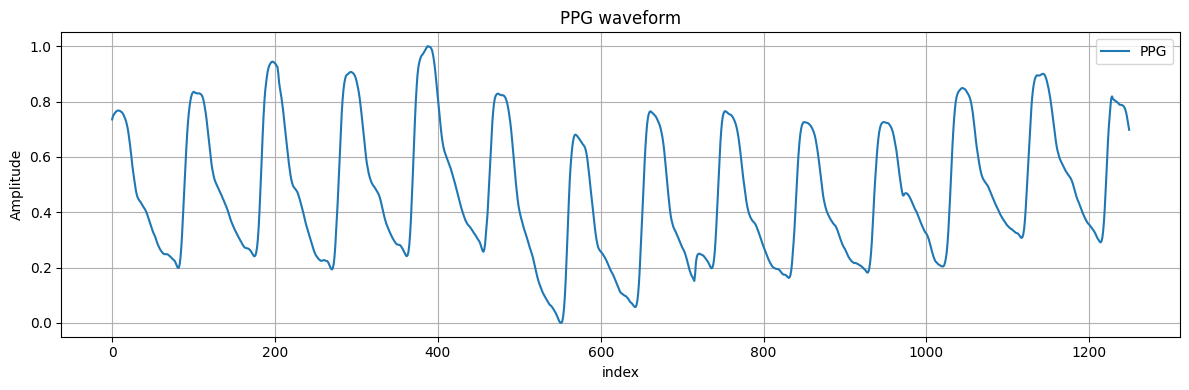

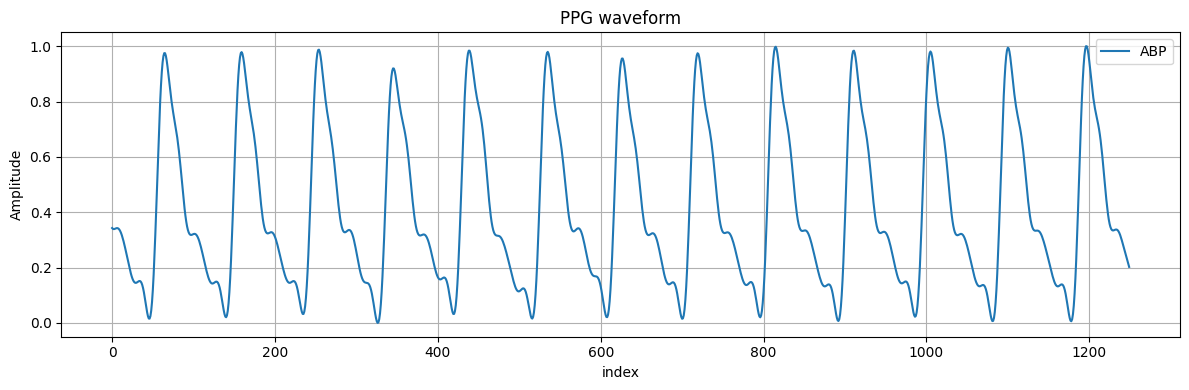

In [2]:
#plot path1 ppg
plt.figure(figsize=(12,4))
plt.plot(ppg1,label="PPG")
plt.title("PPG waveform")
plt.xlabel("index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#plot path1 ppg
plt.figure(figsize=(12,4))
plt.plot(abp1,label="ABP")
plt.title("PPG waveform")
plt.xlabel("index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

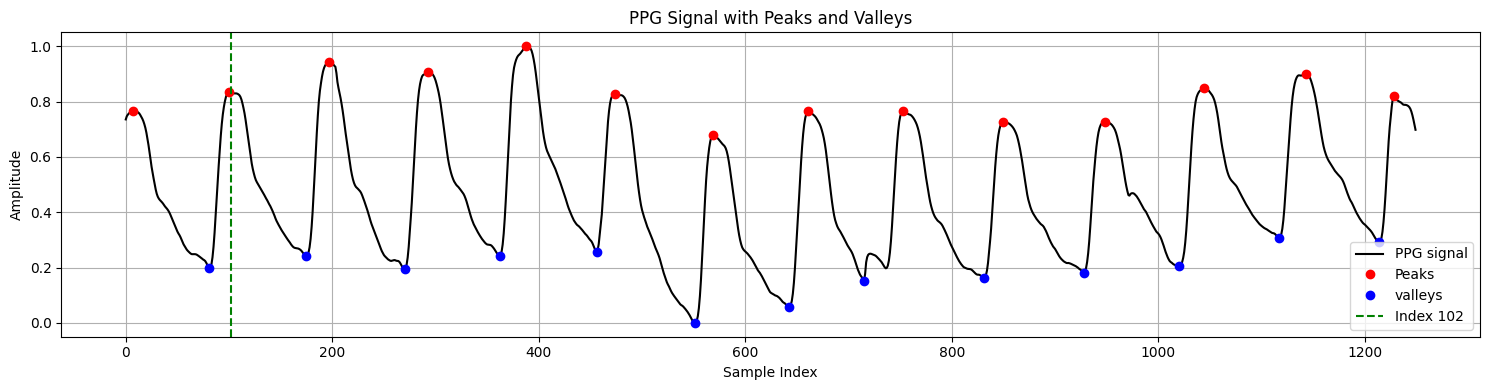

In [3]:
# find the peaks and foot for abp and ppg 
from scipy.signal import find_peaks
min_dist = 0.4*fs
ppg_peaks,_ = find_peaks(ppg1,distance=min_dist)
ppg_valley,_ = find_peaks(-ppg1,distance=min_dist)

# plot the ppg signal 
plt.figure(figsize=(15,4))
plt.plot(ppg1,label='PPG signal',color='black')
# mark peaks
plt.plot(ppg_peaks,ppg1[ppg_peaks],'ro',label='Peaks')
# mark valley 
plt.plot(ppg_valley,ppg1[ppg_valley],'bo',label='valleys')
plt.axvline(x=102, color='green', linestyle='--', label='Index 102')
# Add labels, legend, and grid
plt.title("PPG Signal with Peaks and Valleys")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

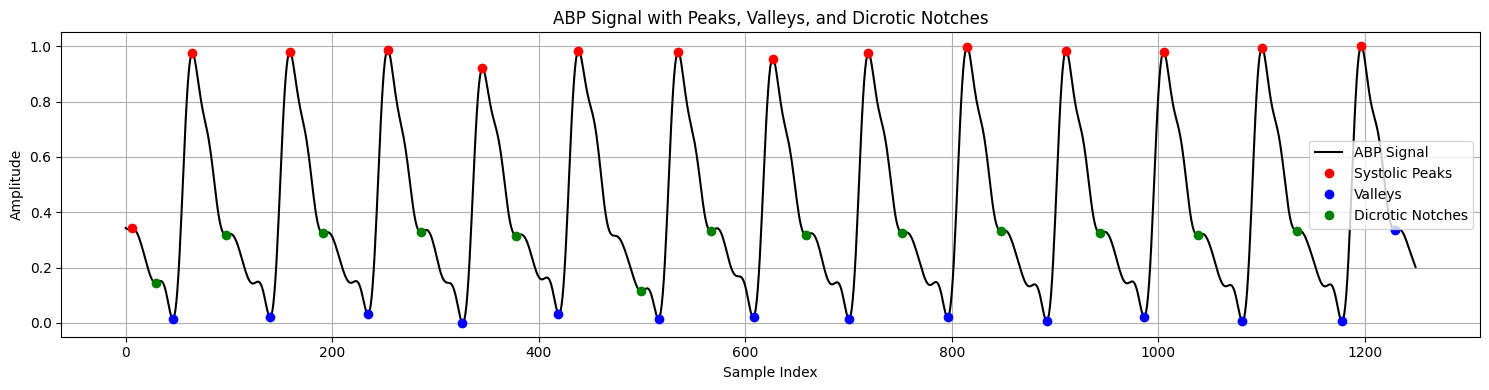

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Detect ABP peaks and valleys
min_dist = int(0.4 * fs)
abp_peaks, _ = find_peaks(abp1, distance=min_dist)
abp_valley, _ = find_peaks(-abp1, distance=min_dist)

# Detect dicrotic notches
dicrotic_notches = []

for i in range(len(abp_peaks)-1):
    peak = abp_peaks[i]
    next_peak = abp_peaks[i+1]

    # Define search window: from peak to halfway to next peak (or full interval)
    segment_start = peak
    segment_end = next_peak

    # Extract this segment of ABP
    segment = abp1[segment_start:segment_end]

    # Find a local minimum (notch) in this segment
    local_min_idx, _ = find_peaks(-segment)  # peaks of negative signal = minima
    if len(local_min_idx) > 0:
        # Choose the first minimum after the peak (could refine with heuristics)
        notch_idx = segment_start + local_min_idx[0]
        dicrotic_notches.append(notch_idx)

# Plot the ABP signal
plt.figure(figsize=(15, 4))
plt.plot(abp1, label='ABP Signal', color='black')

# Mark systolic peaks
plt.plot(abp_peaks, abp1[abp_peaks], 'ro', label='Systolic Peaks')

# Mark valleys
plt.plot(abp_valley, abp1[abp_valley], 'bo', label='Valleys')

# Mark dicrotic notches
dicrotic_notches = np.array(dicrotic_notches)
plt.plot(dicrotic_notches, abp1[dicrotic_notches], 'go', label='Dicrotic Notches')

# Add labels, legend, and grid
plt.title("ABP Signal with Peaks, Valleys, and Dicrotic Notches")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
print(abp_valley,abp_peaks)
print(dicrotic_notches)
print(ppg_valley,ppg_peaks)

# Your valley arrays
abp_valley = np.array(abp_valley)
ppg_valley = np.array(ppg_valley)

# Step 1: Get first ABP valley
first_abp_valley = abp_valley[0]

# Step 2: Find the first value in PPG valley that is greater than ABP valley
ppg_valley_greater = ppg_valley[ppg_valley > first_abp_valley]

if len(ppg_valley_greater) > 0:
    nearest_ppg_valley = ppg_valley_greater[0]
    print(f"First ABP valley: {first_abp_valley}")
    print(f"Nearest greater PPG valley: {nearest_ppg_valley}")
else:
    print("No PPG valley value found that is greater than the first ABP valley.")

offset = nearest_ppg_valley-first_abp_valley


[  46  140  235  326  419  516  608  700  796  892  986 1081 1178 1229] [   6   64  159  254  345  438  535  627  719  815  911 1005 1100 1196]
[  29   97  191  286  378  499  567  659  752  848  943 1038 1134]
[  81  175  270  362  456  551  642  715  831  928 1020 1117 1214] [   7  100  197  293  388  474  569  661  753  850  948 1044 1143 1228]
First ABP valley: 46
Nearest greater PPG valley: 81
